In [ ]:
#Import libraries and load dataset
import pandas as pd
edu=pd.read_csv('world-education-data.csv')

In [ ]:
#Inspect initial rows
edu.head()

,country,country_code,year,gov_exp_pct_gdp,lit_rate_adult_pct,pri_comp_rate_pct,pupil_teacher_primary,pupil_teacher_secondary,school_enrol_primary_pct,school_enrol_secondary_pct,school_enrol_tertiary_pct
0,Afghanistan,AFG,1999,NaN,NaN,NaN,33.18571,NaN,27.298849,NaN,NaN
1,Afghanistan,AFG,2000,NaN,NaN,NaN,NaN,NaN,22.162991,NaN,NaN
2,Afghanistan,AFG,2001,NaN,NaN,NaN,NaN,NaN,22.908590,14.47151,NaN
3,Afghanistan,AFG,2002,NaN,NaN,NaN,NaN,NaN,75.959747,NaN,NaN
4,Afghanistan,AFG,2003,NaN,NaN,NaN,NaN,NaN,96.553680,14.07805,1.38107


Preview the first records to understand structure and value patterns.

In [ ]:
#Review dataset schema
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     5892 non-null   object 
 1   country_code                5892 non-null   object 
 2   year                        5892 non-null   int64  
 3   gov_exp_pct_gdp             4499 non-null   float64
 4   lit_rate_adult_pct          1877 non-null   float64
 5   pri_comp_rate_pct           4440 non-null   float64
 6   pupil_teacher_primary       3676 non-null   float64
 7   pupil_teacher_secondary     3017 non-null   float64
 8   school_enrol_primary_pct    5352 non-null   float64
 9   school_enrol_secondary_pct  4745 non-null   float64
 10  school_enrol_tertiary_pct   4392 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 506.5+ KB


Examine column names, data types, and structural consistency.

In [ ]:
#Generate descriptive statistics
edu.describe().T

,count,mean,std,min,25%,50%,75%,max
year,5892.0,2010.921419,7.119808,1999.000000,2005.000000,2011.000000,2017.000000,2023.000000
gov_exp_pct_gdp,4499.0,4.320129,1.736997,0.242600,3.180390,4.101967,5.163850,15.863470
lit_rate_adult_pct,1877.0,79.483333,17.186877,14.000000,65.984039,83.915154,94.215561,100.000000
pri_comp_rate_pct,4440.0,87.776740,17.857748,14.411250,80.308426,94.604504,99.081194,156.167175
pupil_teacher_primary,3676.0,25.344398,12.780357,5.360520,15.888230,22.172125,32.569205,100.236490
pupil_teacher_secondary,3017.0,17.560340,7.465528,4.979320,11.983680,16.224470,21.583330,80.052320
school_enrol_primary_pct,5352.0,101.525234,13.029901,8.447979,97.281084,101.556335,106.822365,257.434204
school_enrol_secondary_pct,4745.0,78.939810,28.350998,3.293810,59.364799,85.707581,99.230003,194.460022
school_enrol_tertiary_pct,4392.0,36.533796,26.960123,0.117370,12.605780,30.962285,57.325488,166.665649


In [ ]:
#Identify missing values
missing_values=(edu.isna().sum().to_frame('missing')
                .assign(percentage = lambda x: x['missing']/len(edu)).round(4)
                .sort_values('percentage', ascending=False)
               )
missing_values

,missing,percentage
lit_rate_adult_pct,4015,0.6814
pupil_teacher_secondary,2875,0.4879
pupil_teacher_primary,2216,0.3761
school_enrol_tertiary_pct,1500,0.2546
pri_comp_rate_pct,1452,0.2464
gov_exp_pct_gdp,1393,0.2364
school_enrol_secondary_pct,1147,0.1947
school_enrol_primary_pct,540,0.0916
year,0,0.0000
country,0,0.0000


Given the global scale and multi-country coverage, missing values are considered acceptable at this stage.

In [ ]:
#Check for duplicated records
edu.duplicated().sum()

np.int64(0)

No duplicated rows were identified.

In [ ]:
#Identify numerical columns
numeric_cols = (edu.select_dtypes(include='number')).columns
numeric_cols = numeric_cols.drop(['year'])
numeric_cols

Index(['gov_exp_pct_gdp', 'lit_rate_adult_pct', 'pri_comp_rate_pct',
       'pupil_teacher_primary', 'pupil_teacher_secondary',
       'school_enrol_primary_pct', 'school_enrol_secondary_pct',
       'school_enrol_tertiary_pct'],
      dtype='object')

In [ ]:
#Review descriptive statistics for numerical features
edu[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
gov_exp_pct_gdp,4499.0,4.320129,1.736997,0.242600,3.180390,4.101967,5.163850,15.863470
lit_rate_adult_pct,1877.0,79.483333,17.186877,14.000000,65.984039,83.915154,94.215561,100.000000
pri_comp_rate_pct,4440.0,87.776740,17.857748,14.411250,80.308426,94.604504,99.081194,156.167175
pupil_teacher_primary,3676.0,25.344398,12.780357,5.360520,15.888230,22.172125,32.569205,100.236490
pupil_teacher_secondary,3017.0,17.560340,7.465528,4.979320,11.983680,16.224470,21.583330,80.052320
school_enrol_primary_pct,5352.0,101.525234,13.029901,8.447979,97.281084,101.556335,106.822365,257.434204
school_enrol_secondary_pct,4745.0,78.939810,28.350998,3.293810,59.364799,85.707581,99.230003,194.460022
school_enrol_tertiary_pct,4392.0,36.533796,26.960123,0.117370,12.605780,30.962285,57.325488,166.665649


In [ ]:
#Detect outlier: values below zero
(edu[numeric_cols] < 0).sum()

gov_exp_pct_gdp               0
lit_rate_adult_pct            0
pri_comp_rate_pct             0
pupil_teacher_primary         0
pupil_teacher_secondary       0
school_enrol_primary_pct      0
school_enrol_secondary_pct    0
school_enrol_tertiary_pct     0
dtype: int64

All numerical values are non-negative and safe for further analysis.

In [ ]:
#Detect outlier: values exceeding 100 in pct-based variables
pct_cols = ['gov_exp_pct_gdp',
            'lit_rate_adult_pct',
            'pri_comp_rate_pct',
            'school_enrol_primary_pct',
            'school_enrol_secondary_pct',
            'school_enrol_tertiary_pct']
(edu[pct_cols] > 100).sum()

gov_exp_pct_gdp                  0
lit_rate_adult_pct               0
pri_comp_rate_pct              819
school_enrol_primary_pct      3224
school_enrol_secondary_pct    1112
school_enrol_tertiary_pct       46
dtype: int64

Several percentage metrics exhibit large values requiring further evaluation on whether to retain or cap.

In [ ]:
#Detect outlier: IQR method
Q1 = edu[numeric_cols].quantile(0.25)
Q3 = edu[numeric_cols].quantile(0.75)
IQR = Q3-Q1

outliers = ((edu[numeric_cols] < (Q1 - 1.5 * IQR)) |
            (edu[numeric_cols] > (Q3 + 1.5 * IQR)))

outliers.sum().sort_values(ascending=False)

school_enrol_primary_pct      578
pri_comp_rate_pct             225
gov_exp_pct_gdp               127
pupil_teacher_primary          81
pupil_teacher_secondary        62
school_enrol_secondary_pct     12
school_enrol_tertiary_pct      10
lit_rate_adult_pct              4
dtype: int64

The dataset spans countries with highly heterogeneous contexts, resulting in outliers under diverse conditions: population dynamics, over-age enrollment, conflict-affected regions, etc. Under these considerations, most dimensions were preserved, while one variable was selected for capping.

In [ ]:
#Outlier treatment
edu['pri_comp_rate_pct_capped']=edu['pri_comp_rate_pct'].clip(upper=100)
edu['pri_comp_rate_pct_capped'].max()

100.0

Variable: `pri_comp_rate_pct`

Issue Identified:
A substantial number of values exceeding 100% were detected. Completion rates above 100% are theoretically implausible, but may occur due to cohort mismatch or reporting methodology.

Decision:
Values above 100% were capped at 100% to preserve data integrity while maintaining interpretability.

Method Applied:
Domain-driven capping using logical upper bound (100%).

Impact:
Only values above 100% were affected. No rows were removed. Original variable was preserved for traceability. Other variables with outliers were preserved due to: structural country-level factors and relatively low outlier prevalence.

In [ ]:
#Reorganize cleaned variables
edu=edu[['country', 'country_code', 'year', 'gov_exp_pct_gdp',
       'lit_rate_adult_pct', 'pri_comp_rate_pct', 'pri_comp_rate_pct_capped', 'pupil_teacher_primary',
       'pupil_teacher_secondary', 'school_enrol_primary_pct',
       'school_enrol_secondary_pct', 'school_enrol_tertiary_pct'
       ]]

In [ ]:
#Generate cleaned dataset
edu_clean=edu.drop('pri_comp_rate_pct', axis=1)

A cleaned table was created to facilitate downstream analysis/

In [ ]:
#Data quality assessment: row and column count
edu_clean.shape

(5892, 11)

In [ ]:
#Data quality assessment: country coverage and temporal range
[(edu_clean['country'].nunique(), edu_clean['year'].nunique()),
 edu_clean.shape, (edu_clean.year.min(), edu_clean.year.max())]

[(256, 25), (5892, 11), (1999, 2023)]

The dataset covers 256 countries with a maximum time span of 25 years (1999–2023).

In [ ]:
#Data quality assessment: completeness of attributes
edu_clean_attr=edu_clean.drop(['country', 'country_code', 'year'], axis=1)
edu_clean['attr_count']=edu_clean_attr.notna().sum(axis=1)
edu_clean['all_attr']=len(edu_clean_attr.columns)

edu_clean

,country,country_code,year,gov_exp_pct_gdp,lit_rate_adult_pct,pri_comp_rate_pct_capped,pupil_teacher_primary,pupil_teacher_secondary,school_enrol_primary_pct,school_enrol_secondary_pct,school_enrol_tertiary_pct,attr_count,all_attr
0,Afghanistan,AFG,1999,NaN,NaN,NaN,33.18571,NaN,27.298849,NaN,NaN,2,8
1,Afghanistan,AFG,2000,NaN,NaN,NaN,NaN,NaN,22.162991,NaN,NaN,1,8
2,Afghanistan,AFG,2001,NaN,NaN,NaN,NaN,NaN,22.908590,14.47151,NaN,2,8
3,Afghanistan,AFG,2002,NaN,NaN,NaN,NaN,NaN,75.959747,NaN,NaN,1,8
4,Afghanistan,AFG,2003,NaN,NaN,NaN,NaN,NaN,96.553680,14.07805,1.381070,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5887,Zimbabwe,ZWE,2018,2.05049,NaN,90.726250,NaN,NaN,97.879271,NaN,8.425119,4,8
5888,Zimbabwe,ZWE,2019,NaN,93.227547,90.232155,NaN,NaN,97.476614,NaN,9.995644,4,8
5889,Zimbabwe,ZWE,2020,NaN,NaN,91.866905,NaN,NaN,97.384162,NaN,9.723605,3,8
5890,Zimbabwe,ZWE,2021,NaN,NaN,86.099625,NaN,NaN,96.015148,NaN,NaN,2,8


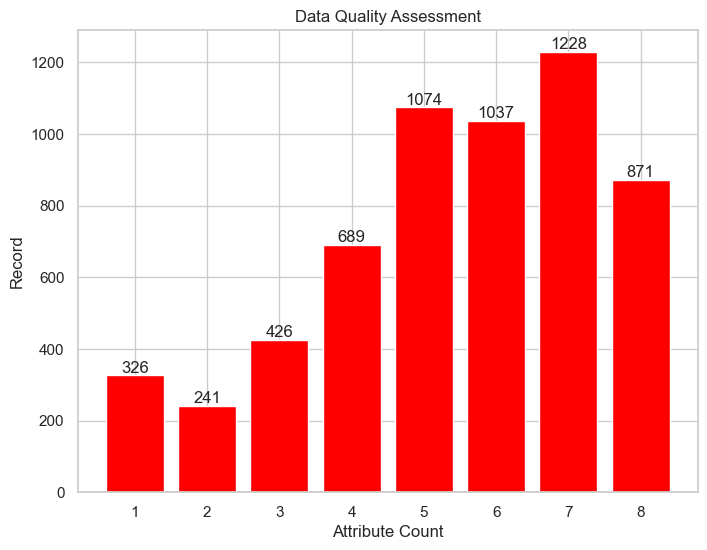

In [ ]:
#Data quality assessment: number of filled attributes per record
filled_attr=edu_clean['attr_count'].value_counts()

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
attrbars = plt.bar(filled_attr.index, filled_attr.values, color='red')

for bar in attrbars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2,
             str(bar.get_height()), ha='center', va='bottom', fontsize=12)

plt.title('Data Quality Assessment')
plt.xlabel('Attribute Count')
plt.ylabel('Record')

plt.show()

Approximately 30% of records contain four or fewer populated attributes.

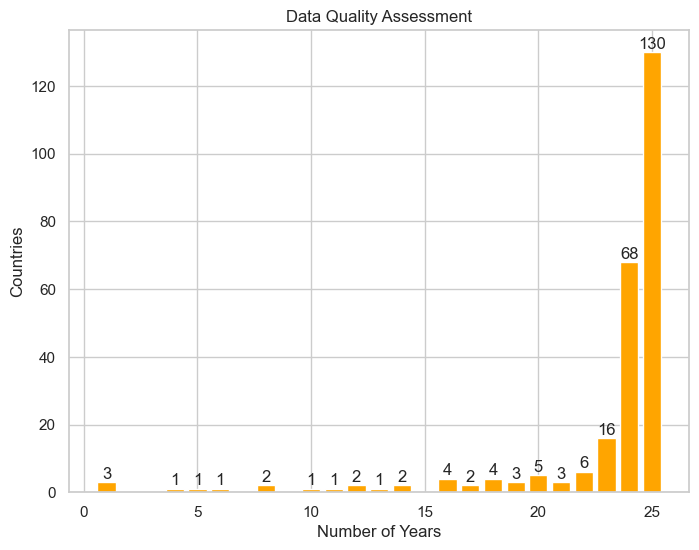

In [ ]:
#Data quality assessment: number of years recorded per country
countries_record_year = edu_clean.groupby('country').size()
record_year_count = countries_record_year.value_counts()

plt.figure(figsize=(8,6))
yearbars = plt.bar(record_year_count.index, record_year_count.values, color='orange')

for bar in yearbars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2,
             str(bar.get_height()), ha='center', va='bottom', fontsize=12)

plt.title('Data Quality Assessment')
plt.xlabel('Number of Years')
plt.ylabel('Countries')

plt.show()

Around 80% of countries have complete records across the full 25-year period

In [ ]:
#Import libraries for visualization and set the style
import seaborn as sns

sns.set(style='whitegrid')

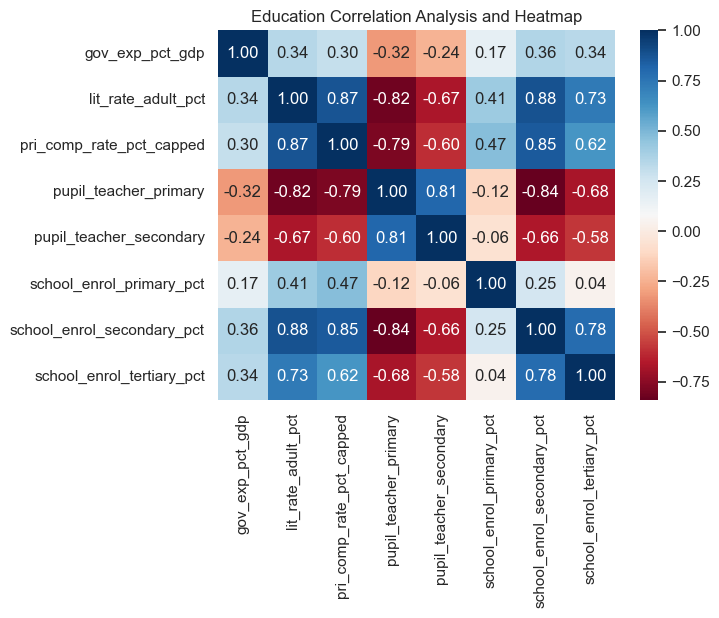

In [ ]:
#Metrics correlation analysis and and heatmap visualizaiton
edu_corr=edu_clean_attr.corr()

edu_heatmap=sns.heatmap(edu_corr, annot=True, cmap='RdBu', fmt='.2f')
plt.title('Education Correlation Analysis and Heatmap')
plt.show()

Literacy rate serves as a key indicator of educational outcomes, as higher literacy levels are positively associated with school enrollment and completion, while correlating with lower pupil–teacher ratios.

Conversely, higher pupil–teacher ratios are consistently correlated with significantly weaker performance across other education indicators, especially literacy level. Highlighting the potential limitations of instructional capacity at overcrowded class sizes.

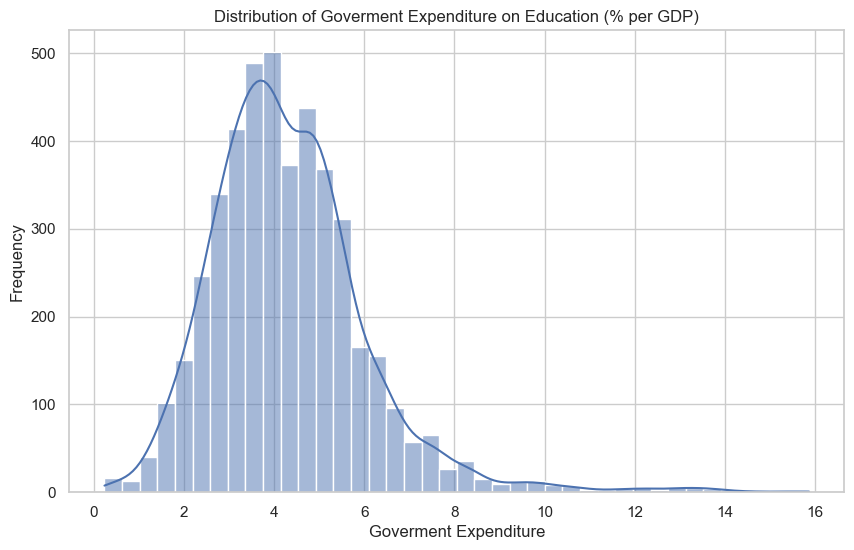

In [ ]:
#Histogram of goverment expenditure on education
plt.figure(figsize=(10, 6))
sns.histplot(edu_clean['gov_exp_pct_gdp'], kde=True, bins=40)
plt.title('Distribution of Goverment Expenditure on Education (% per GDP)')
plt.xlabel('Goverment Expenditure')
plt.ylabel('Frequency')
plt.show()

The histogram shows a unimodal, right-skewed distribution of government education expenditure (% of GDP), with most observations concentrated between 3–5%. A small number of countries exhibit substantially higher values,reflecting specific policy and economic conditions rather than general trends.

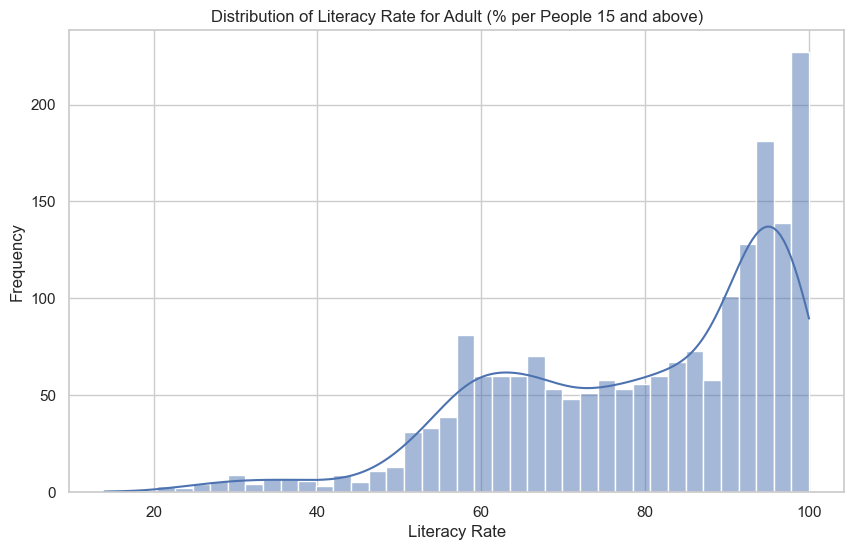

In [ ]:
#Histogram of literacy rate for adult
plt.figure(figsize=(10, 6))
sns.histplot(edu_clean['lit_rate_adult_pct'], kde=True, bins=40)
plt.title('Distribution of Literacy Rate for Adult (% per People 15 and above)')
plt.xlabel('Literacy Rate')
plt.ylabel('Frequency')
plt.show()

Adult literacy rates display a left-skewed distribution, with most values concentrated between 80–100% and variation driven primarily by lower-performing countries.

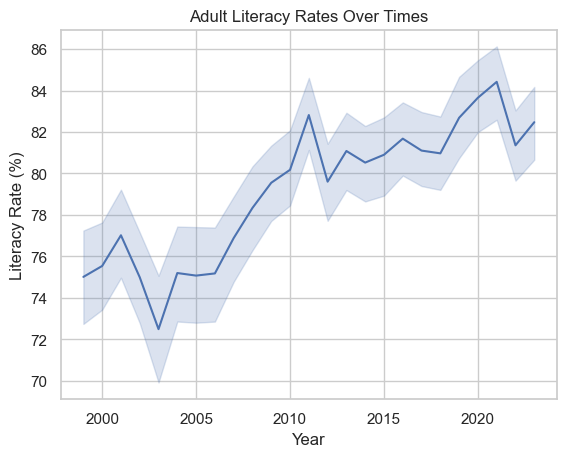

In [ ]:
#Lineplot of adult literacy over time
sns.lineplot(data=edu_clean, x='year', y='lit_rate_adult_pct', errorbar=('ci', 68))
plt.title('Adult Literacy Rates Over Times')
plt.xlabel('Year')
plt.ylabel('Literacy Rate (%)')
plt.show()

Adult literacy rates exhibit a clear upward trend over time, reflecting sustained global progress despite short-term fluctuations.

In [ ]:
#Extract country with full adult literacy record
lit_count=edu_clean.groupby('country')['lit_rate_adult_pct'].count()
lit_count[lit_count==25]

country
Africa Eastern and Southern                             25
Africa Western and Central                              25
Arab World                                              25
Early-demographic dividend                              25
East Asia & Pacific                                     25
East Asia & Pacific (IDA & IBRD countries)              25
East Asia & Pacific (excluding high income)             25
Europe & Central Asia                                   25
Europe & Central Asia (IDA & IBRD countries)            25
Europe & Central Asia (excluding high income)           25
Fragile and conflict affected situations                25
Heavily indebted poor countries (HIPC)                  25
IBRD only                                               25
IDA & IBRD total                                        25
IDA blend                                               25
IDA only                                                25
IDA total                                       

Despite having a complete 25-year time span, not every recorded year has complete data across all attributes.

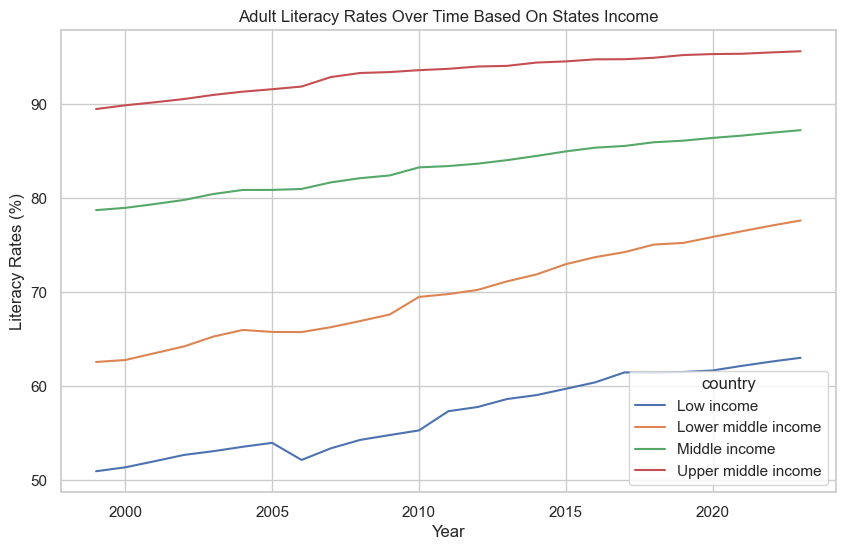

In [ ]:
#Lineplot for adult literacy rates over time (specific countries)
lit_byincome1 = ['Low income', 'Lower middle income', 'Upper middle income', 'Middle income']
lit_byincome2 = edu_clean[edu_clean['country'].isin(lit_byincome1)]

plt.figure(figsize=(10, 6))

sns.lineplot(data=lit_byincome2, x='year', y='lit_rate_adult_pct', hue='country', errorbar=None)
plt.title('Adult Literacy Rates Over Time Based On States Income')
plt.xlabel('Year')
plt.ylabel('Literacy Rates (%)')
plt.show()

Adult literacy rates increase across all income groups over time, but substantial disparities remain. Reflecting ongoing inequality in educational outcomes.

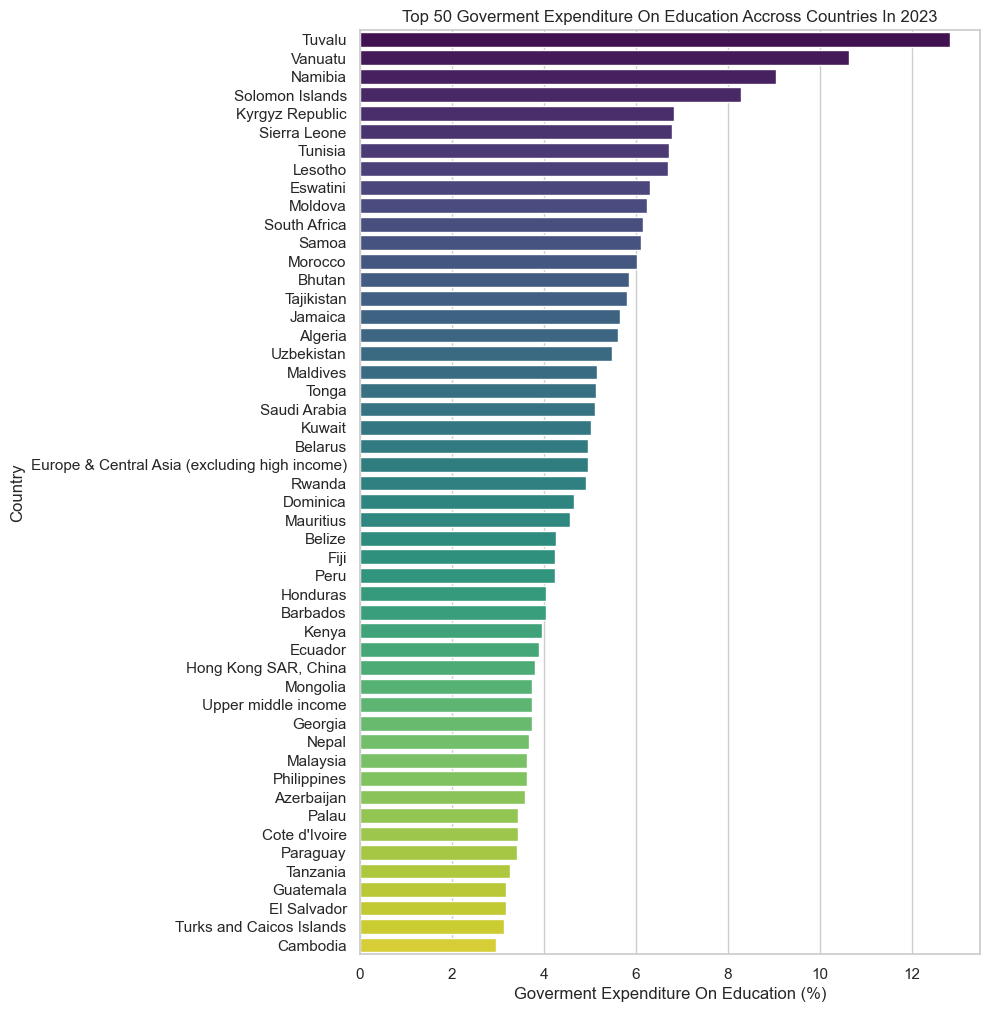

In [ ]:
#Barplot of goverment expenditure on education 2023
edu_2023=edu_clean[edu_clean['year']==2023].sort_values('gov_exp_pct_gdp', ascending=False).head(50)

plt.figure(figsize=(8, 12))

sns.barplot(data=edu_2023, x='gov_exp_pct_gdp', y='country', hue='country', palette='viridis')
plt.title('Top 50 Goverment Expenditure On Education Accross Countries In 2023')
plt.xlabel('Goverment Expenditure On Education (%)')
plt.ylabel('Country')
plt.show()

Government education spending (% of GDP) differs substantially across countries. Smaller and developing economies often allocate a higher GDP share to education, highlighting policy prioritization rather than economic capacity as the key driver of expenditure levels.